In [1]:
from __future__ import division
from numpy import pi, linspace, sin, cos, exp, log, sqrt, dot
from numpy.linalg import norm
import numpy.random as rnd
import random

import os
import numpy as np
import matplotlib.pyplot as plt
#import theano as T


sigmoid = lambda x: 1/(1+np.exp(-x))
#import theano as T

%matplotlib inline
import seaborn
import sys
import h5py
sys.path.append('/home/yves/Documents/')
import twoptb as MP
from skimage.transform import rotate

seaborn.set(font_scale=2)
print 2

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


2


In [2]:
def expand_training_set(areaFile):
    ims = []; masks = []
    sz = 20
    training_images = []; training_masks = []
    rotations = np.arange(0,360,120)
    #rotations = [30]
    x_shifts = np.arange(-2,4,2)
    y_shifts = np.arange(-2,4,2)
    areaMax = np.max(np.max(areaFile.attrs['mean_image']))
    
    
    for idx,pos in enumerate(areaFile.attrs['ROI_centres']):
        y = pos[0]; x= pos[1]
        if (x-sz>0 and x+sz<512 and y-sz>0 and y+sz<512):
            ims.append(areaFile.attrs['mean_image'][int(x)-sz:int(x)+sz,int(y)-sz:int(y)+sz])
            masks.append(np.pad(areaFile.attrs['ROI_masks'][:,:,idx],[10,10],mode='constant'))

    for mask,im in zip(masks,ims):

        #for angle in rotations:

        for x_shift in x_shifts:

            for y_shift in y_shifts:
                #a = rotate(im,angle=angle,order=5)
                training_images.append(im[10+x_shift:-10+x_shift,10+y_shift:-10+y_shift].astype('int'))
                training_masks.append(mask[10+x_shift:-10+x_shift,10+y_shift:-10+y_shift].astype('int'))
                    
                    
    training_set = [(np.array([np.array(i).flatten()/areaMax]).T, np.array([np.array(j).flatten()]).T)
                    for i,j in zip(training_images,training_masks)]
    return training_set

In [3]:
sys.path.append('/home/yves/Documents/')
import twoptb as MP
HDF_File = h5py.File('/media/yves/Storage 2/Mitt.h5','r')

In [4]:
sessions = HDF_File.keys()
areas = HDF_File[sessions[0]]['registered_data'].keys()

In [5]:
areaFile = HDF_File[sessions[0]]['registered_data'][areas[0]]

In [6]:
for i in HDF_File[sessions[0]]['registered_data'][areas[1]].attrs.iterkeys():
    
    if 'ROI' in i :
        print i

ROI_patches
ROI_masks
ROI_centres


In [7]:
areaFile = HDF_File[sessions[0]]['registered_data'][areas[5]]
areaFile.attrs['ROI_masks'].shape

(20, 20, 181)

In [404]:
training_set = []

for i in [0,1,2,3,5,6]:
    areaFile = HDF_File[sessions[0]]['registered_data'][areas[i]]
    egs = expand_training_set(areaFile)
    training_set = training_set + egs

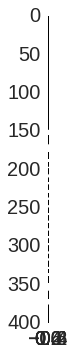

In [405]:
plt.imshow(training_set[0][1][:,:],cmap='binary_r')

<h2> Get Test Data </h2>

In [9]:
testPatches = []
testMasks = []
i = 8
areaFile = HDF_File[sessions[0]]['registered_data'][areas[i]]
areaMax = np.max(np.max(areaFile.attrs['mean_image']))
testPatches = testPatches + [areaFile.attrs['ROI_patches'][:,:,i].T.flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
testMasks   =   testMasks + [areaFile.attrs['ROI_masks'][:,:,i].T.flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]
testPatches = [np.array([ptch]).T for ptch in testPatches]
testMasks = [np.array([ptch]).T for ptch in testMasks]
test_set = [(i,j) for i,j in zip(testPatches,testMasks)]

<h2> Create Training Data </h2>

In [433]:
patches = []
masks = []
for i in range(7):
    areaFile = HDF_File[sessions[0]]['registered_data'][areas[i]]
    areaMax = np.max(np.max(areaFile.attrs['mean_image']))
    patches = patches + [areaFile.attrs['ROI_patches'][:,:,i].T.flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
    masks   =   masks + [areaFile.attrs['ROI_masks'][:,:,i].T.flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]
    patches = patches + [areaFile.attrs['ROI_patches'][:,:,i].flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
    masks   =   masks + [areaFile.attrs['ROI_masks'][:,:,i].flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]
    patches = patches + [np.flipud(areaFile.attrs['ROI_patches'][:,:,i]).flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
    masks   =   masks + [np.flipud(areaFile.attrs['ROI_masks'][:,:,i]).flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]
    patches = patches + [np.fliplr(areaFile.attrs['ROI_patches'][:,:,i]).flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
    masks   =   masks + [np.fliplr(areaFile.attrs['ROI_masks'][:,:,i]).flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]
    
    patches = patches + [np.flipud(areaFile.attrs['ROI_patches'][:,:,i]).T.flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
    masks   =   masks + [np.flipud(areaFile.attrs['ROI_masks'][:,:,i]).T.flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]
    patches = patches + [np.fliplr(areaFile.attrs['ROI_patches'][:,:,i]).T.flatten()/areaMax for i in range(areaFile.attrs['ROI_patches'].shape[2])]
    masks   =   masks + [np.fliplr(areaFile.attrs['ROI_masks'][:,:,i]).T.flatten() for i in range(areaFile.attrs['ROI_masks'].shape[2])]


In [434]:
patches = [np.array([ptch]).T for ptch in patches]
masks = [np.array([ptch]).T for ptch in masks]
#patches = patches + [np.array([np.zeros(400)]).T]*10
#masks = masks + [np.array([np.zeros(400)]).T]*10
#patches = patches + [np.array([np.ones(400)]).T]*10
#masks = masks + [np.array([np.ones(400)]).T]*10

print patches[1].shape
print masks[-1].shape

(400, 1)
(400, 1)


In [435]:
ptchMean = np.mean(patches)
training_set = [(i-ptchMean,j) for i,j in zip(patches,masks)]


In [436]:
""" Multi Layer Perceptron"""


class multilayer_perceptron(object):
    
    

    
    def __init__(self,units_per_layer,activation='sigmoid',costF='quadratic',dropout=[False,0.5]):
        self.num_layers = len(units_per_layer)
        self.biases = [np.random.randn(y, 1) for y in units_per_layer[1:]]
        #square root weight initialisation added np.sqrt
        self.weights = [np.random.randn(y, x)/np.sqrt(x)
                        for x, y in zip(units_per_layer[:-1], units_per_layer[1:])]
        self.test_log = []
        self.training_log = []
        self.dropout = dropout[0]
        self.dropout_frac = dropout[1]
        self.dropMask = [np.zeros(i) for i in units_per_layer]
        if activation=='sigmoid':
            self.activation = lambda x: 1./(1.+np.exp(-x))
            self.activation_deriv = lambda x: sigmoid(x)*(1-sigmoid(x))
        elif activation=='tanh':
            self.activation = lambda x: np.tanh(x)
            self.activation_deriv = lambda x: 1 - self.activation(x)**2
        else:
            raise ValueError
            
        if costF=='cross_entropy':
            self.costF = lambda a,y: 1/len(a) * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
            if self.dropout: 
                self.get_output_delta = lambda a,y,z: (a-y)
            else:
                self.get_output_delta = lambda a,y,z: (a-y)
        
        elif costF=='quadratic':
            self.costF = lambda a,y: 1/len(a) * np.sum(norm(x-y)**2)
            self.get_output_delta = lambda a,y,z: ((a>-y)*
                                            self.activation_deriv(z))



    def forwardpass(self, a):
        """Return the output of the network if 'a`` is input."""
        for b, w in zip(self.biases, self.weights):
            if self.dropout:
                a = self.activation(np.dot(w, a)+b)*self.dropout_frac
            else:
                a = self.activation(np.dot(w, a)+b)
        return a

        
        
    def miniBatch_backprop(self,network_inputs,target_activation):

            #print network_inputs.shape[1]
            delta_cost_biass = [np.zeros(list(b.shape) + [network_inputs.shape[1]]) for b in self.biases]
            delta_cost_weights = [np.zeros(list(w.shape) + [target_activation.shape[1]]) for w in self.weights]
            weighted_activations = []; 
            a = network_inputs
            activations = [a]
            "first perform the forward pass"
            lIdx = 1
            for b, w in zip(self.biases, self.weights):
                if self.dropout:
                    print lIdx+1
                    self.dropMask[lIdx] = np.random.binomial(n=1,p=self.dropout_frac,
                                                             size=[self.dropMask[lIdx].shape[0],30])
                    z = np.dot(w, a)+b 
                    weighted_activations.append(z*self.dropMask[lIdx])
                    a = sigmoid(z)
                    activations.append(a*self.dropMask[lIdx])
                    lIdx += 1
                else:
                    z = np.dot(w, a)+b 
                    weighted_activations.append(z)
                    a = sigmoid(z)
                    activations.append(a)
                    
                
    
    
            "calculate the ouput errors"
            delta = self.get_output_delta(activations[-1],target_activation,weighted_activations[-1])
            
            
            
            delta_cost_biass[-1] = np.array([delta.sum(axis=1)]).T
            delta_cost_weights[-1] = np.einsum('ik,jk->kij', delta, activations[-2]).sum(axis=0)


            for l in xrange(2,self.num_layers):
                delta = np.dot(self.weights[-l+1].T,delta)*self.activation_deriv(weighted_activations[-l])
                delta_cost_biass[-l] = np.array([delta.sum(axis=1)]).T
                if self.dropout:
                    delta_cost_weights[-l] =  np.einsum('ik,jk->kij', delta, activations[-l-1]).sum(axis=0)
                else:
                    delta_cost_weights[-l] =  np.einsum('ik,jk->kij', delta, activations[-l-1]).sum(axis=0)
            return delta_cost_weights, delta_cost_biass

        
    
    def minibatch_weight_update(self,mini_batch,eta):

        delta_cost_biass = [np.zeros(b.shape) for b in self.biases]
        delta_cost_weights = [np.zeros(w.shape) for w in self.weights]
        
        #recursive for calculating errors over training examples
        n_minibatch = len(mini_batch)
        
        x_data = np.squeeze(np.array([mini_batch[i][0] for i in range(n_minibatch)])).T
        y_data = np.squeeze(np.array([mini_batch[i][1] for i in range(n_minibatch)])).T
        

        delta_cost_weights, delta_cost_biass = self.miniBatch_backprop(x_data,y_data)
        
       
        
        #regularised version
        self.weights = [(1-eta*(self.lmbda/self.nExamples))*w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, delta_cost_weights)]
        
        #This is the unregularised version
        #self.weights = [w-(eta/len(mini_batch))*nw
        #                for w, nw in zip(self.weights, delta_cost_weights)]
        #print b.shape, nb.shape
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, delta_cost_biass)]
    
    def stochastic_gradient_descent(self, training_data, epochs, mini_batch_size, eta, lmbda= 1,
                                    test_data=None,toShow=False):
        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        self.nExamples = n
        self.lmbda = lmbda
        for j in xrange(epochs):
            print 'Epoch: %s,' %j,
            random.shuffle(training_data)
            
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            
            tempL = []
            for mini_batch in mini_batches:
                #print [i.shape for i in self.biases]
                self.minibatch_weight_update(mini_batch, eta)
                tempL.append(self.evaluate(mini_batch))
                
                #print 'ho'
            self.training_log.append(np.mean(tempL))
            print 'Training Set Error: %s ' %(np.sum(tempL)/self.nExamples),
            if test_data:
                #print "Epoch {0}: {1} / {2}".format(
                #    j, self.evaluate(test_data), n_test)
                self.test_log.append(self.evaluate(test_data))
                print 'Test set Error per example: %s' %(self.test_log[-1]/len(test_data))
            else:
                if toShow==True:
                    print "Epoch {0} complete".format(j)
                else:
                    pass
    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [self.forwardpass(x)-y for x,y in test_data]
        #test_results = [(np.argmax(self.forwardpass(x)), y)
        #                for (x, y) in test_data]
        #return sum(int(x == y) for (x, y) in test_results)
        return np.sum(np.abs(test_results))
    
                
                
                

In [437]:
np.sum([150,50,40,400])

640

In [438]:
mlp.dropMask[0].shape[0]

400

In [ ]:
#mlp = multilayer_perceptron([400,1200,400],costF='cross_entropy',activation='sigmoid')
mlp = multilayer_perceptron([400,150,50,40,200,400],costF='cross_entropy',activation='sigmoid')

mlp.stochastic_gradient_descent(training_set, 2000, 20, eta=.00005, lmbda = 100,
                                test_data=test_set,toShow=False)

#old[400,150,50,40,400,400]

Epoch: 0, Training Set Error: 183.294887249  Test set Error per example: 171.22548183
Epoch: 1, Training Set Error: 160.222822546  Test set Error per example: 150.406911372
Epoch: 2,

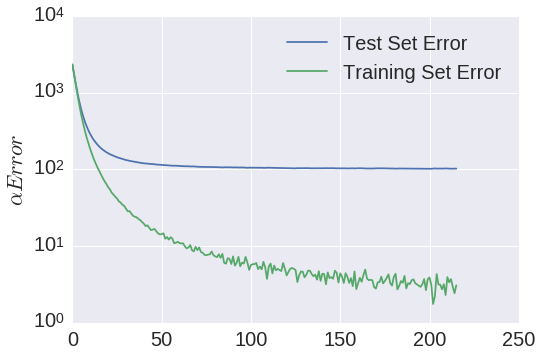

In [425]:
import seaborn
plt.plot(np.array(mlp.test_log)/(np.max(mlp.test_log)/np.max(mlp.training_log)),label='Test Set Error')
plt.plot(mlp.training_log,label='Training Set Error')
plt.gca().set_yscale("log", nonposy='clip')
plt.ylabel(r'$\alpha Error$')
plt.legend()

In [426]:
(np.max(mlp.test_log)/np.max(mlp.training_log))

8.6007250347278301

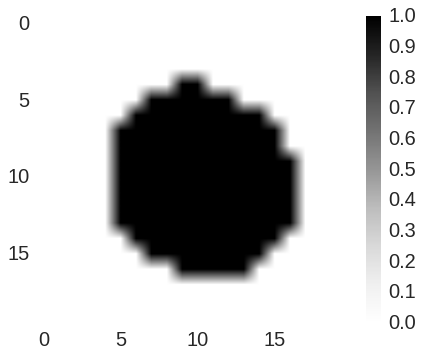

In [427]:
with seaborn.axes_style('dark'):
    plt.imshow(mlp.forwardpass(np.zeros([400,1])).reshape(20,20)>.25)
    plt.colorbar()

In [428]:
len(test_set)

192

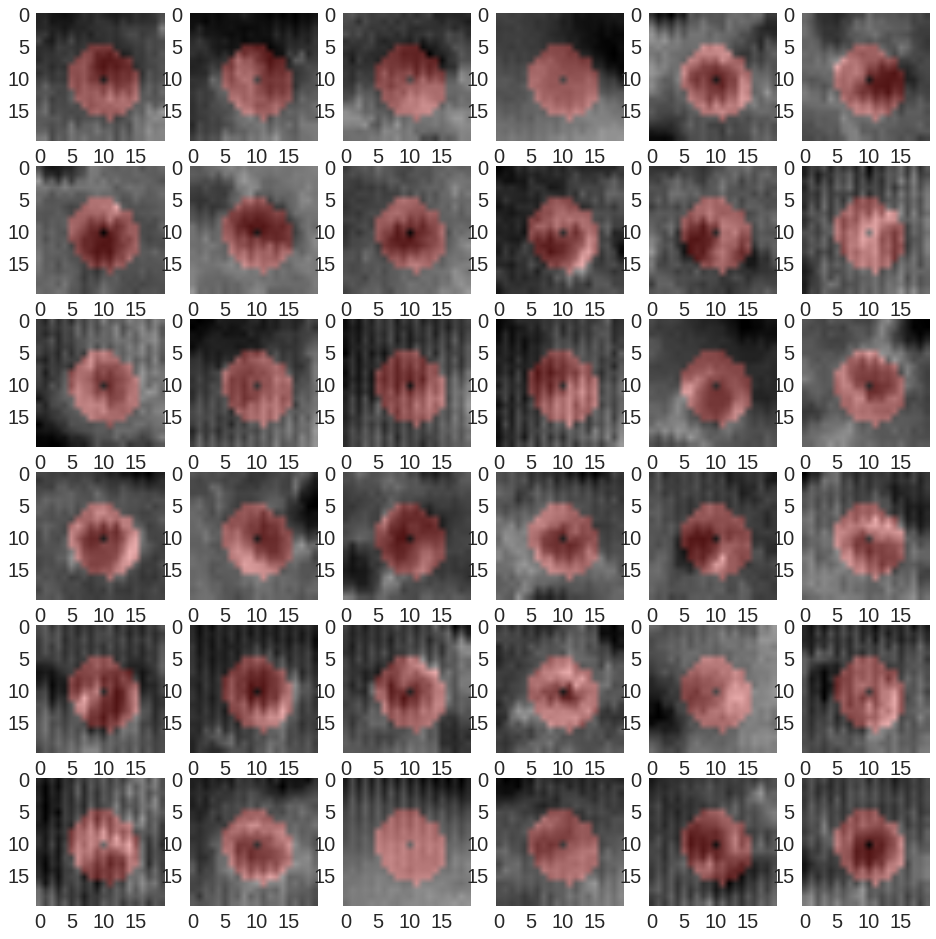

In [429]:

with seaborn.axes_style('dark'):

    plt.figure(figsize=(16,16))
    for i in range(1,37):
        plt.subplot(6,6,i)
        idx = i - 1
        plt.imshow(test_set[idx+100][0].reshape(20,20),cmap='binary_r')
        fwdPass = mlp.forwardpass(test_set[idx][0]).reshape(20,20)>.3
        plt.imshow(np.dstack([fwdPass*.8,fwdPass*.2,fwdPass*.2]),alpha=.4)

        #plt.colorbar()

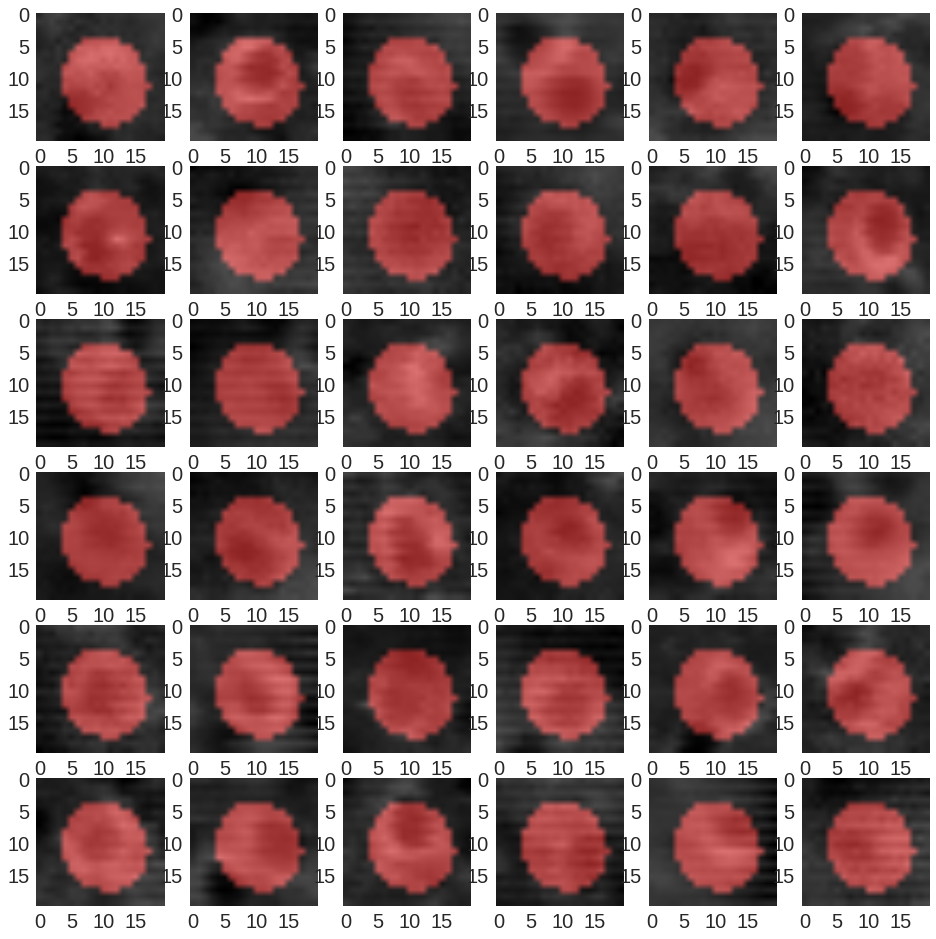

In [431]:
with seaborn.axes_style('dark'):

    plt.figure(figsize=(16,16))
    for i in range(1,37):
        plt.subplot(6,6,i)
        idx = i - 1

        plt.imshow(training_set[idx+50][0].reshape(20,20),cmap='binary_r')
        fwdPass = mlp.forwardpass(training_set[idx][0]).reshape(20,20)>.2
        plt.imshow(np.dstack([fwdPass*.8,fwdPass*.2,fwdPass*.2]),alpha=.7)

        #plt.colorbar()

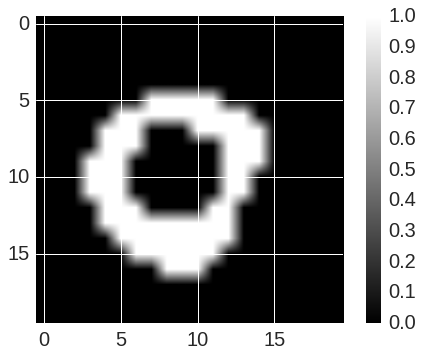

In [323]:
plt.imshow(training_set[idx][1].reshape(20,20),cmap='binary_r')
plt.colorbar()

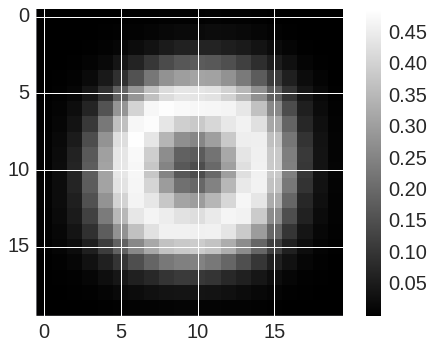

In [387]:
plt.imshow((mlp.forwardpass(training_set[idx][0])).reshape(20,20),cmap='binary_r',interpolation='none')
plt.colorbar()